In [ ]:
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()
    
def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')


In [ ]:
names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)


In [ ]:
names_link


'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'

In [ ]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix


In [ ]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)


In [ ]:
print_dataset('Train', train_data)


Dataset Train. Shape: (96, 8)
[[41.   0.   1.   1.   0.   1.   0.   1. ]
 [36.   0.   1.   0.   0.   0.   0.   0. ]
 [37.7  0.   0.   1.   1.   0.   1.   0. ]
 [40.   1.   1.   1.   1.   0.   1.   1. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [37.   0.   0.   1.   0.   0.   1.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.7  0.   0.   1.   1.   0.   1.   0. ]
 [40.4  1.   1.   0.   1.   0.   0.   1. ]
 [37.   0.   0.   1.   1.   0.   1.   0. ]
 [37.   0.   1.   0.   0.   0.   0.   0. ]
 [36.8  0.   0.   1.   1.   1.   1.   0. ]
 [41.   1.   1.   0.   1.   0.   0.   1. ]
 [38.1  0.   1.   1.   0.   1.   0.   1. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.8  0.   0.   1.   0.   0.   1.   0. ]
 [37.9  0.   0.   1.   0.   0.   1.   0. ]
 [40.   1.   1.   0.   1.   0.   0.   1. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [40.9  0.   1.   1.   0.   1.   0.   1. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [37.1  0.   1.   0.   0

In [ ]:
import tensorflow as tf

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
learning_rate = 0.01
num_iterations = 20000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [ ]:
import numpy as np

In [ ]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)

def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output1 = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    output2 = Variable(torch.tensor(data[:, 7], dtype = torch.float32))
    return input, output1, output2

input, output1, output2 = get_input_and_output(train_data)
test_input, test_output1, test_output2 = get_input_and_output(test_data)

import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title1 = 'Inflammation of Urinary Bladder'
diagnosis_title2 = 'Nephritis of Renal Pelvis Origin'

def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def train_model(diagnosis_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output.unsqueeze(1))
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


iteration=0, loss=6.2444, train_acc=45.83%
iteration=500, loss=1.4182, train_acc=45.83%
iteration=1000, loss=0.8153, train_acc=61.46%
iteration=1500, loss=0.2737, train_acc=85.42%
iteration=2000, loss=0.1859, train_acc=100.00%
iteration=2500, loss=0.1672, train_acc=100.00%
iteration=3000, loss=0.1521, train_acc=100.00%
iteration=3500, loss=0.1397, train_acc=100.00%
iteration=4000, loss=0.1293, train_acc=100.00%
iteration=4500, loss=0.1204, train_acc=100.00%
iteration=5000, loss=0.1127, train_acc=100.00%
iteration=5500, loss=0.1059, train_acc=100.00%
iteration=6000, loss=0.0999, train_acc=100.00%
iteration=6500, loss=0.0946, train_acc=100.00%
iteration=7000, loss=0.0898, train_acc=100.00%
iteration=7500, loss=0.0855, train_acc=100.00%
iteration=8000, loss=0.0816, train_acc=100.00%
iteration=8500, loss=0.0780, train_acc=100.00%
iteration=9000, loss=0.0748, train_acc=100.00%
iteration=9500, loss=0.0718, train_acc=100.00%
iteration=10000, loss=0.0690, train_acc=100.00%
iteration=10500, los

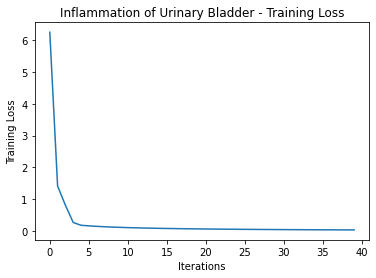

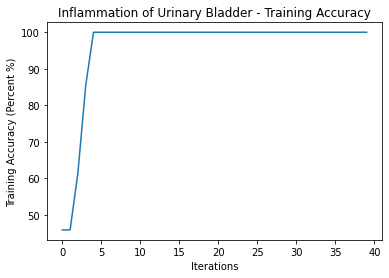


Testing Accuracy = 100.00%


In [ ]:
#output1 = output1.unsqueeze(1) 
#loss = criterion(prediction, output.unsqueeze(1))
model = train_model(diagnosis_title1, input, output1, test_input, test_output1)


iteration=0, loss=0.7640, train_acc=39.58%


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


iteration=500, loss=1.5443, train_acc=39.58%
iteration=1000, loss=1.2006, train_acc=39.58%
iteration=1500, loss=0.8156, train_acc=66.67%
iteration=2000, loss=0.4005, train_acc=84.38%
iteration=2500, loss=0.1997, train_acc=100.00%
iteration=3000, loss=0.1845, train_acc=100.00%
iteration=3500, loss=0.1719, train_acc=100.00%
iteration=4000, loss=0.1610, train_acc=100.00%
iteration=4500, loss=0.1516, train_acc=100.00%
iteration=5000, loss=0.1432, train_acc=100.00%
iteration=5500, loss=0.1358, train_acc=100.00%
iteration=6000, loss=0.1292, train_acc=100.00%
iteration=6500, loss=0.1232, train_acc=100.00%
iteration=7000, loss=0.1177, train_acc=100.00%
iteration=7500, loss=0.1127, train_acc=100.00%
iteration=8000, loss=0.1082, train_acc=100.00%
iteration=8500, loss=0.1040, train_acc=100.00%
iteration=9000, loss=0.1001, train_acc=100.00%
iteration=9500, loss=0.0965, train_acc=100.00%
iteration=10000, loss=0.0931, train_acc=100.00%
iteration=10500, loss=0.0900, train_acc=100.00%
iteration=11000,

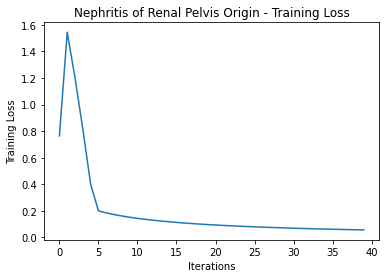

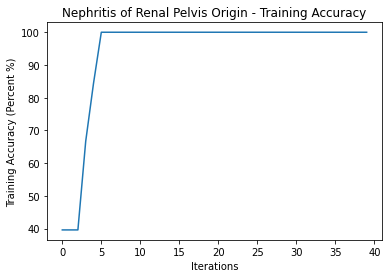


Testing Accuracy = 100.00%


In [ ]:
model = train_model(diagnosis_title2, input, output2, test_input, test_output2)


In [ ]:
!pip install syft


In [ ]:
!pip install syft=="0.2.2a1"

In [ ]:
!pip install syft_proto=="0.1.1a1.post17"

In [ ]:
import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim


In [ ]:
n_hospitals = 4
hospitals = []


In [ ]:
for i in range(n_hospitals):
    hospital_name = 'hospital{}'.format(i)
    hospital = sy.VirtualWorker(hook, id = hospital_name)
    hospitals.append(hospital)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")


In [ ]:
def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(n_hospitals):
    workers = [hospitals[i2] for i2 in range(n_hospitals) if i2 != i] + [secure_worker]
    add_and_print_workers(hospitals[i], workers)
add_and_print_workers(secure_worker, hospitals)


workers of hospital0 = ['hospital1', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'hospital3', 'secure_worker']
workers of hospital3 = ['hospital0', 'hospital1', 'hospital2', 'secure_worker']
workers of secure_worker = ['hospital0', 'hospital1', 'hospital2', 'hospital3']


In [ ]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets1 = []
hospital_targets2 = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, :6].clone().detach().requires_grad_(True)
    targets1 = train_data2[:, 6][:, None].clone().detach() 
    targets2 = train_data2[:, 7][:, None].clone().detach() 
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets1.append(targets1.send(hospitals[i]))
    hospital_targets2.append(targets2.send(hospitals[i]))

print(model)


LogisticRegression(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)


In [ ]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()


In [ ]:
def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 1000 #2000
worker_iterations = 5


In [ ]:
def federated_learning(diagnosis_title, hospital_features, hospital_targets, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.SGD(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.bias.set_(avg_bias.get())
        if iteration % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['1.1678', '0.6273', '1.7701', '2.0642'], accuracies=['54.17%', '62.50%', '50.00%', '41.67%']
Iteration=100, losses=['0.9610', '0.8764', '1.3488', '1.3377'], accuracies=['54.17%', '83.33%', '50.00%', '41.67%']
Iteration=200, losses=['0.6895', '0.2570', '0.9944', '0.8541'], accuracies=['54.17%', '100.00%', '50.00%', '58.33%']
Iteration=300, losses=['0.2528', '0.1991', '0.3835', '0.2140'], accuracies=['87.50%', '87.50%', '75.00%', '100.00%']
Iteration=400, losses=['0.1834', '0.1594', '0.1881', '0.1735'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=500, losses=['0.1648', '0.1432', '0.1693', '0.1551'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=600, losses=['0.1497', '0.1307', '0.1543', '0.1410'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1373', '0.1206', '0.1421', '0.1295'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1268', '0.1120', '0.1317', '0.

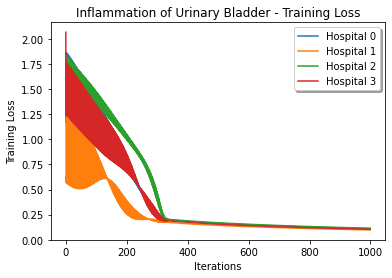

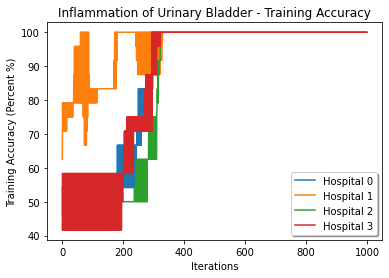


Testing Accuracy = 100.00%


In [ ]:
model = federated_learning(diagnosis_title1, hospital_features, hospital_targets1, test_input, test_output1)


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['1.4742', '1.2348', '2.1578', '0.7349'], accuracies=['33.33%', '37.50%', '37.50%', '75.00%']
Iteration=100, losses=['0.6759', '1.7907', '0.6002', '0.3988'], accuracies=['66.67%', '100.00%', '62.50%', '95.83%']
Iteration=200, losses=['0.7605', '0.9987', '0.6808', '0.3279'], accuracies=['66.67%', '41.67%', '62.50%', '100.00%']
Iteration=300, losses=['0.6122', '1.0105', '0.6139', '0.2309'], accuracies=['66.67%', '50.00%', '62.50%', '91.67%']
Iteration=400, losses=['0.5106', '0.9040', '0.3897', '0.1971'], accuracies=['66.67%', '66.67%', '70.83%', '91.67%']
Iteration=500, losses=['0.4048', '0.5047', '0.2139', '0.1677'], accuracies=['66.67%', '66.67%', '100.00%', '95.83%']
Iteration=600, losses=['0.2635', '0.2509', '0.1743', '0.1504'], accuracies=['87.50%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.2020', '0.2530', '0.1590', '0.1387'], accuracies=['100.00%', '83.33%', '100.00%', '100.00%']
Iteration=800, losses=['0.1875', '0.2273', '0.1479', '0.1291'], a

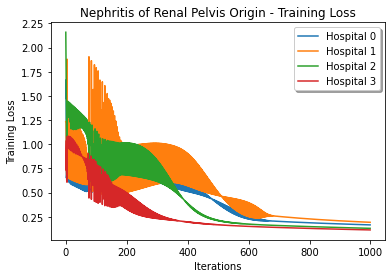

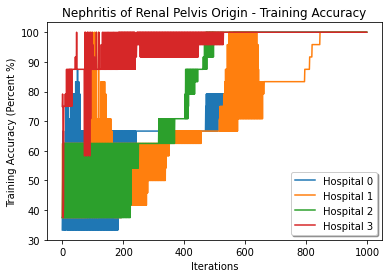


Testing Accuracy = 100.00%


In [ ]:
model = federated_learning(diagnosis_title2, hospital_features, hospital_targets2, test_input, test_output2)
